# **Welcome to the Data Analysis/Visualization of Covid-19 in WHO Regions Tool**





**Google Colab Users:** <br>
Using the following cell, import Pandas, Seaborn, Matplotlib as Google Colab comes with pre-installed Python libraries.

**Local System Users:** <br>
1) Download and install a terminal such as Miniforge and the latest version of Python. <br>

2) Using Miniforge install Pandas, Seaborn, Matplotlib as follows: <br>
*   pip install pandas
*   pip install seaborn
*   pip install matplotlib


Now, run the following cell to import the preceding.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Now that we have the preceding imports, we can utilize pandas as pd to read a CSV file consisiting of covid-19 data. For the sake of example, this program uses the Covid-19 data of 2020 from WorldoMeters. <br> <br>
You can change the example CSV file to your own of the same format as in columns and data points by replacing the link inside of the '' to read the file. <br><br>
The following cell reads the CSV file and displays it.

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/geethavangala/Data-Analysis-Visualization-Covid-19-WHO-Regions/main/Covid-19-WHO-Regions.csv')
raw_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,7/27/2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,7/27/2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,7/27/2020,7235,60,6028,1147,Europe


Now, that we have the CSV file reading into "raw_data". Let us create a dataframe "data_df" in the following cell using the first line. <br> <br>

Following that, let us use the second line drop the columns of "Province/State", "Lat", and "Long" as they are not necesary for our Analysis. <br><br>

Finally, the third line displays the updated table.

In [4]:
data_df = pd.DataFrame(raw_data)
data_df.drop(data_df.columns[[0, 2, 3]], axis = 1, inplace=True)
data_df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,1/22/2020,0,0,0,0,Eastern Mediterranean
1,Albania,1/22/2020,0,0,0,0,Europe
2,Algeria,1/22/2020,0,0,0,0,Africa
3,Andorra,1/22/2020,0,0,0,0,Europe
4,Angola,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,7/27/2020,865,14,734,117,Africa
49064,Yemen,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,Comoros,7/27/2020,354,7,328,19,Africa
49066,Tajikistan,7/27/2020,7235,60,6028,1147,Europe


Now, let us detect any missing values in the dataset using "isna()". Adding the ".sum" at the end calculates the number of missing values in each column.

In [5]:
data_df.isna().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

Now, let us print information about the DataFrame such as the number of columns, column data types, memory usage, range index, and the number of cells in each column using ".info()"

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  49068 non-null  object
 1   Date            49068 non-null  object
 2   Confirmed       49068 non-null  int64 
 3   Deaths          49068 non-null  int64 
 4   Recovered       49068 non-null  int64 
 5   Active          49068 non-null  int64 
 6   WHO Region      49068 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


Following that, let us use the ".describe()" to return description of the data for each column: <br> 
count - The number of not-empty values.<br> 
mean - The average (mean) value. <br> 
std - The standard deviation. <br> 
min - the minimum value. <br> 
25% - The 25% percentile*. <br> 
50% - The 50% percentile*. <br> 
75% - The 75% percentile*.<br> 
max - the maximum value.

In [7]:
data_df.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


Now, let us create a new DataFrame called "Active_Cases_In_Country_df" to sort the sum of active cases in each country in the entire data set. <br><br>
The dataset presents cases on a daily basis for each country. For that reason, we must sum the values of Active cases  for each country for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 countries with the most active cases.

In [8]:
Active_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Active']].sum()
Active_Cases_In_Country_df.sort_values(['Active'], ascending=False, inplace=True)
Active_Cases_In_Country_df.head(10)

,Active
Country/Region,
US,156981121
Brazil,31094060
United Kingdom,22624595
Russia,19668578
India,15987913
France,10980287
Spain,9277432
Canada,8656985
Peru,7748957


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 Countries of Most Active Cases. 

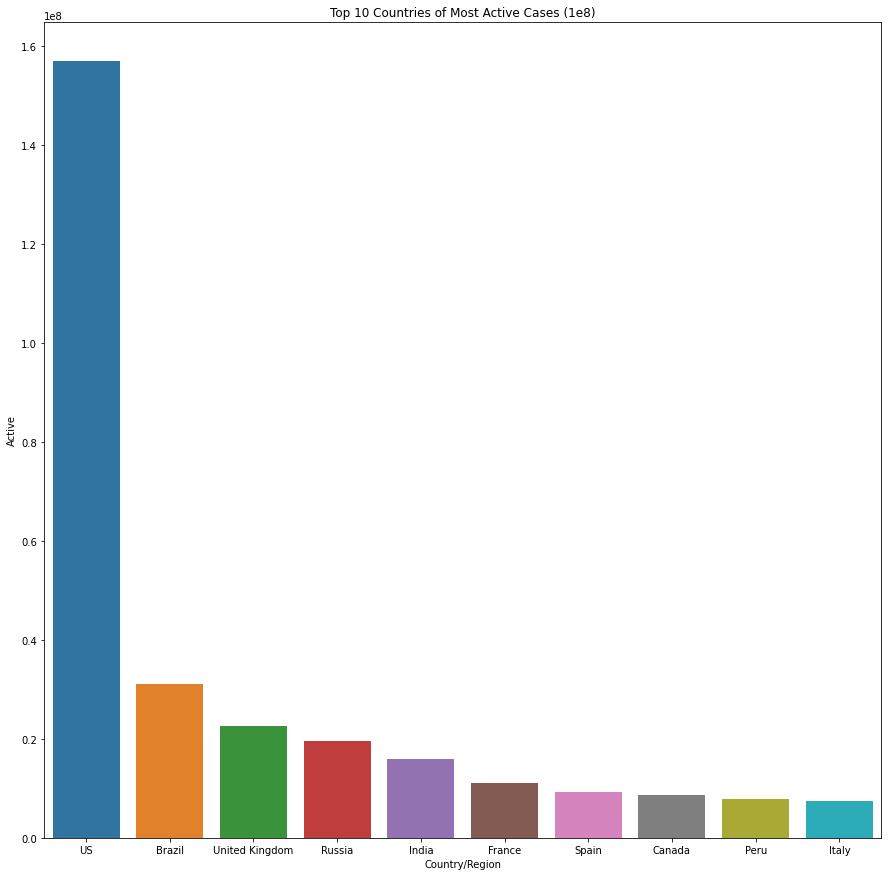

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Active_Cases_In_Country_df.head(10), x=Active_Cases_In_Country_df.head(10).index, y="Active", ax=ax).set(title='Top 10 Countries of Most Active Cases (1e8)')

Now, let us create a new DataFrame called "Deaths_Cases_In_Country_df" to sort the sum of deaths cases in each country in the entire data set. <br><br>
The dataset presents cases on a daily basis for each country. For that reason, we must sum the values of Deaths cases  for each country for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 countries with the most deaths cases.

In [ ]:
Deaths_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Deaths']].sum()
Deaths_Cases_In_Country_df.sort_values(['Deaths'], ascending=False, inplace=True)
Deaths_Cases_In_Country_df.head(10)

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
Spain,3033030
Mexico,1728277
India,1111831
Iran,1024136


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 Countries of Most Deaths Cases. 

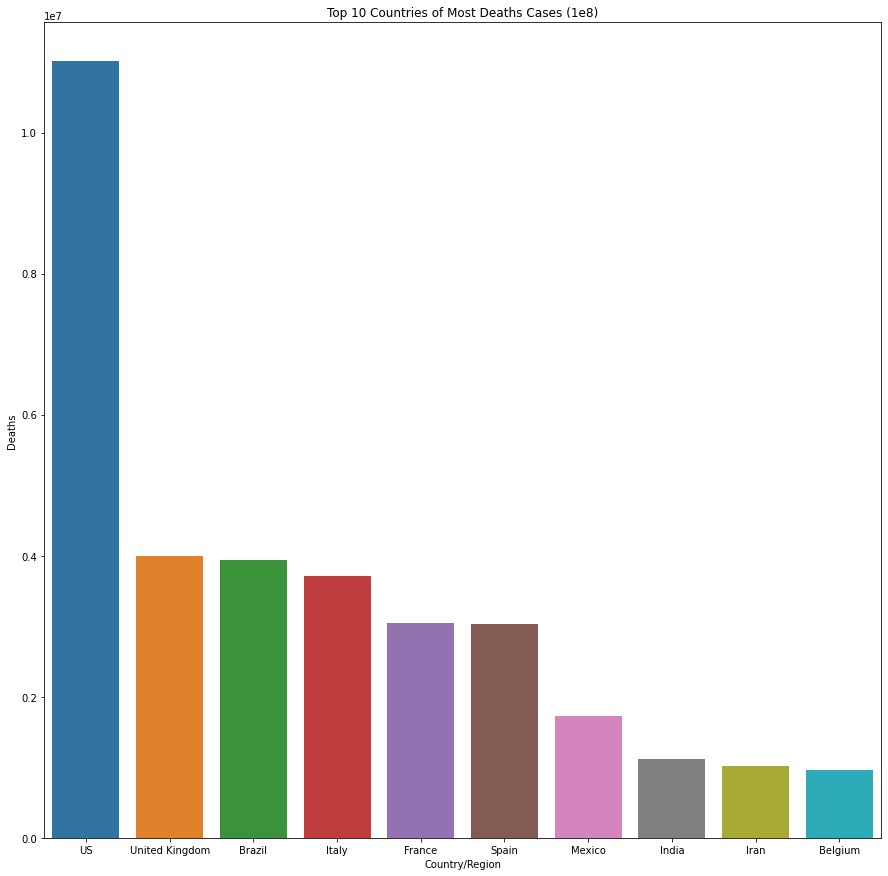

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Deaths_Cases_In_Country_df.head(10), x=Deaths_Cases_In_Country_df.head(10).index, y="Deaths", ax=ax).set(title='Top 10 Countries of Most Deaths Cases (1e7)')

Now, let us create a new DataFrame called "Recovered_Cases_In_Country_df" to sort the sum of Recovered cases in each country in the entire data set. <br><br>
The dataset presents cases on a daily basis for each country. For that reason, we must sum the values of Recovered cases  for each country for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 countries with the most Recovered cases.

In [ ]:
Recovered_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Recovered']].sum()
Recovered_Cases_In_Country_df.sort_values(['Recovered'], ascending=False, inplace=True)
Recovered_Cases_In_Country_df.head(10)

,Recovered
Country/Region,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
Italy,15673910
Iran,15200895
Spain,15093583
Turkey,13345389


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 Countries of Most Recovered Cases. 

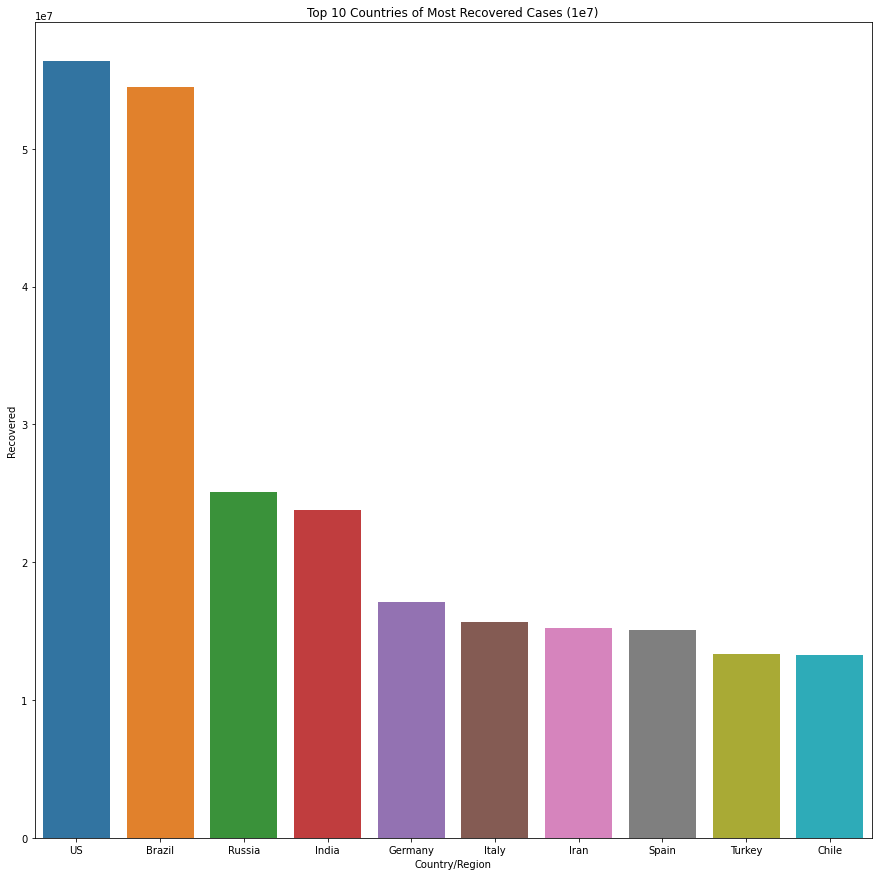

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Recovered_Cases_In_Country_df.head(10), x=Recovered_Cases_In_Country_df.head(10).index, y="Recovered", ax=ax).set(title='Top 10 Countries of Most Recovered Cases (1e7)')

Now, let us create a new DataFrame called "Active_Cases_In_WHO_Region_df" to sort the sum of Active cases in each WHO Region in the entire data set. <br><br>
The dataset presents cases on a daily basis for each WHO Region. For that reason, we must sum the values of Active cases for each WHO Region for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 WHO Regions with the most Active cases.

In [ ]:
Active_Cases_In_WHO_Region_df = data_df.groupby(['WHO Region'])[['Active']].sum()
Active_Cases_In_WHO_Region_df.sort_values(['Active'], ascending=False, inplace=True)
Active_Cases_In_WHO_Region_df

,Active
WHO Region,
Americas,225832458
Europe,106406678
Eastern Mediterranean,24108160
South-East Asia,23629904
Africa,10158119
Western Pacific,6580031


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 WHO Regions of Most Active Cases. 

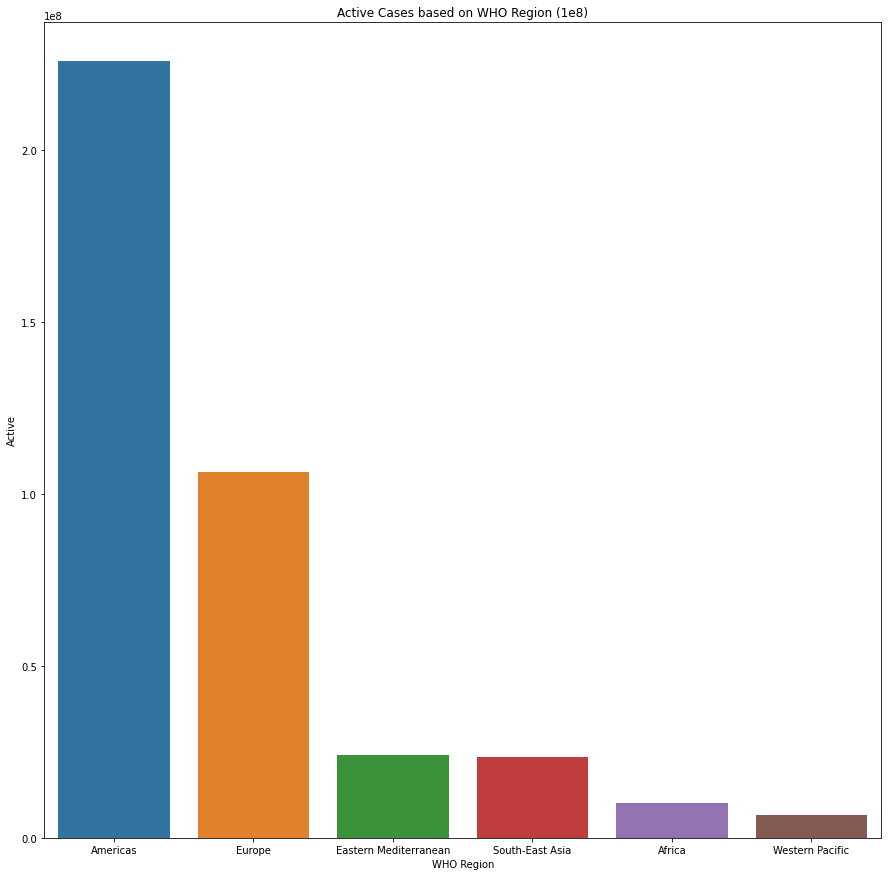

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Active_Cases_In_WHO_Region_df, x=Active_Cases_In_WHO_Region_df.index, y="Active", ax=ax).set(title='Active Cases based on WHO Region (1e8)')

Now, let us create a new DataFrame called "Deaths_Cases_In_WHO_Region_df" to sort the sum of Deaths cases in each WHO Region in the entire data set. <br><br>
The dataset presents cases on a daily basis for each WHO Region. For that reason, we must sum the values of Deaths cases for each WHO Region for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 WHO Regions with the most Deaths cases.

In [ ]:
Deaths_Cases_In_WHO_Region_df = data_df.groupby(['WHO Region'])[['Deaths']].sum()
Deaths_Cases_In_WHO_Region_df.sort_values(['Deaths'], ascending=False, inplace=True)
Deaths_Cases_In_WHO_Region_df

,Deaths
WHO Region,
Americas,19359292
Europe,19271040
Eastern Mediterranean,1924029
South-East Asia,1458134
Western Pacific,932430
Africa,439978


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 WHO Regions of Most Deaths Cases. 

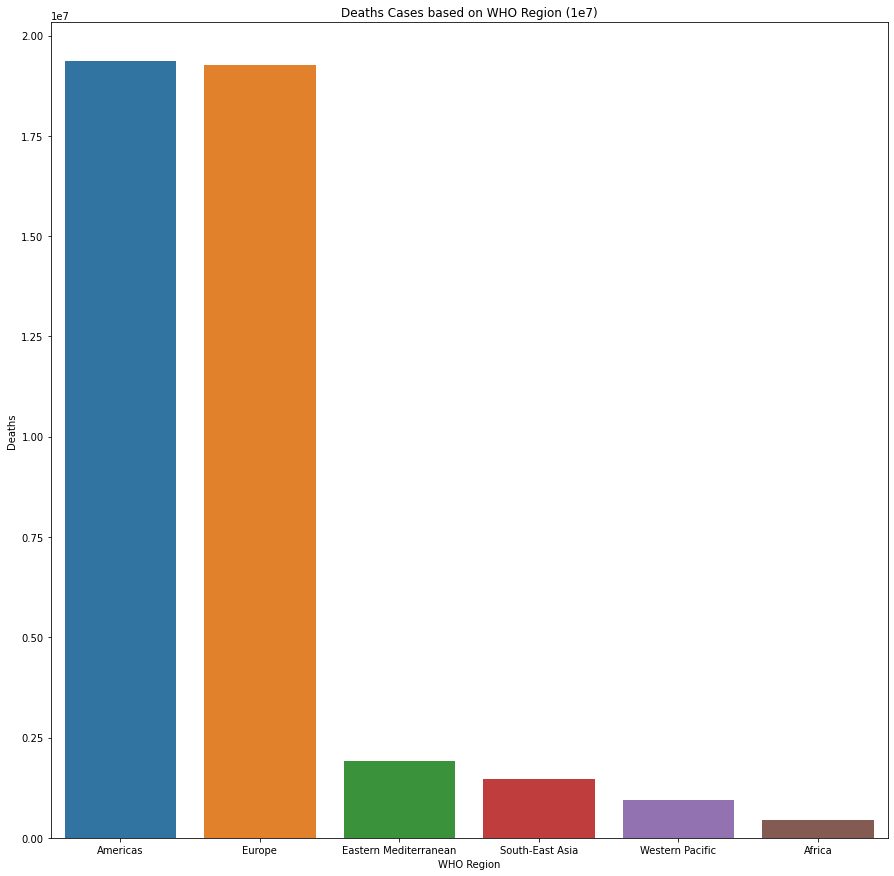

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Deaths_Cases_In_WHO_Region_df, x=Deaths_Cases_In_WHO_Region_df.index, y="Deaths", ax=ax).set(title='Deaths Cases based on WHO Region (1e7)')

Now, let us create a new DataFrame called "Recovered_Cases_In_WHO_Region_df" to sort the sum of Recovered cases in each WHO Region in the entire data set. <br><br>
The dataset presents cases on a daily basis for each WHO Region. For that reason, we must sum the values of Recovered cases for each WHO Region for each date. <br><br>
The following cell begins by computing the sum and then sorting the values in descending order.<br><br>
Finally, it outputs the table with the top 10 WHO Regions with the most Recovered cases.

In [ ]:
Recovered_Cases_In_WHO_Region_df = data_df.groupby(['WHO Region'])[['Recovered']].sum()
Recovered_Cases_In_WHO_Region_df.sort_values(['Recovered'], ascending=False, inplace=True)
Recovered_Cases_In_WHO_Region_df

,Recovered
WHO Region,
Americas,157069444
Europe,123202075
Eastern Mediterranean,48050703
South-East Asia,30030327
Western Pacific,18861950
Africa,11193730


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Top 10 WHO Regions of Most Recovered Cases. 

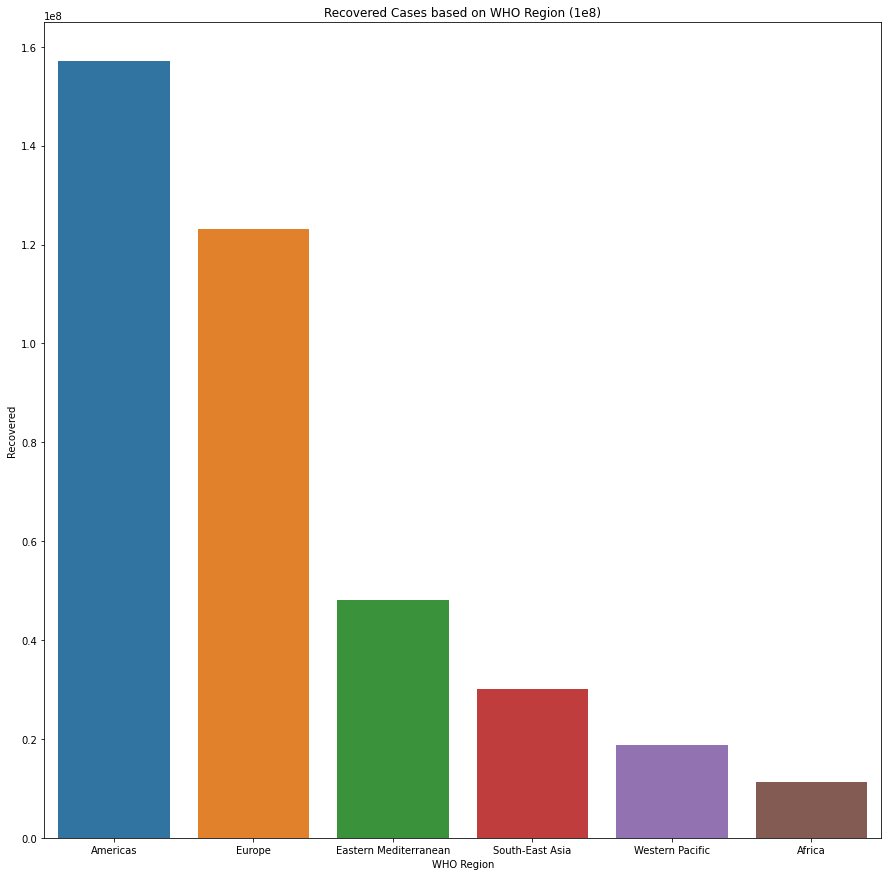

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Recovered_Cases_In_WHO_Region_df, x=Recovered_Cases_In_WHO_Region_df.index, y="Recovered", ax=ax).set(title='Recovered Cases based on WHO Region (1e8)')

Now, let us revisit our original DataFrame "data_df" and create a new DataFrame that includes the active, deaths, and recovered cases for each data worldwide. <br><br>

The following cell creates the new DataFrame and calculates the sum of Active, Deaths, adn Recovered cases worldwide as the original DataFrame showcases the cases per country. <br><br>

Following that, the cell sorts the DataFrame in the order of the date and outputs the DataFrame.

In [24]:
Cases_In_Months_df = data_df.groupby(['Date'])[['Active','Deaths','Recovered']].sum()
Cases_In_Months_df.set_axis(['Active', 'Deaths', 'Recovered'],axis = 'columns',inplace=True)
Cases_In_Months_df = Cases_In_Months_df.sort_values('Active',ascending=False)
Cases_In_Months_df

,Active,Deaths,Recovered
Date,,,
2020-07-27,6358362,654036,9468087
2020-07-26,6309711,648621,9293464
2020-07-25,6243930,644517,9158743
2020-07-24,6212290,639650,8939705
2020-07-23,6166006,633506,8710969
...,...,...,...
2020-01-26,2010,56,52
2020-01-25,1353,42,39
2020-01-24,879,26,36


Now, let us reprsent the data in the table in a visual format using seaborn and matplotlib. <br><br>
The first line ensures that the graph is at the size of 15 x 15 using matplotlib ".subplots" function. <br><br>
The second line uses seaborn to output the bargraph using the DataFrame from the above cell to represent the Covid-19 Stats In 2020. 

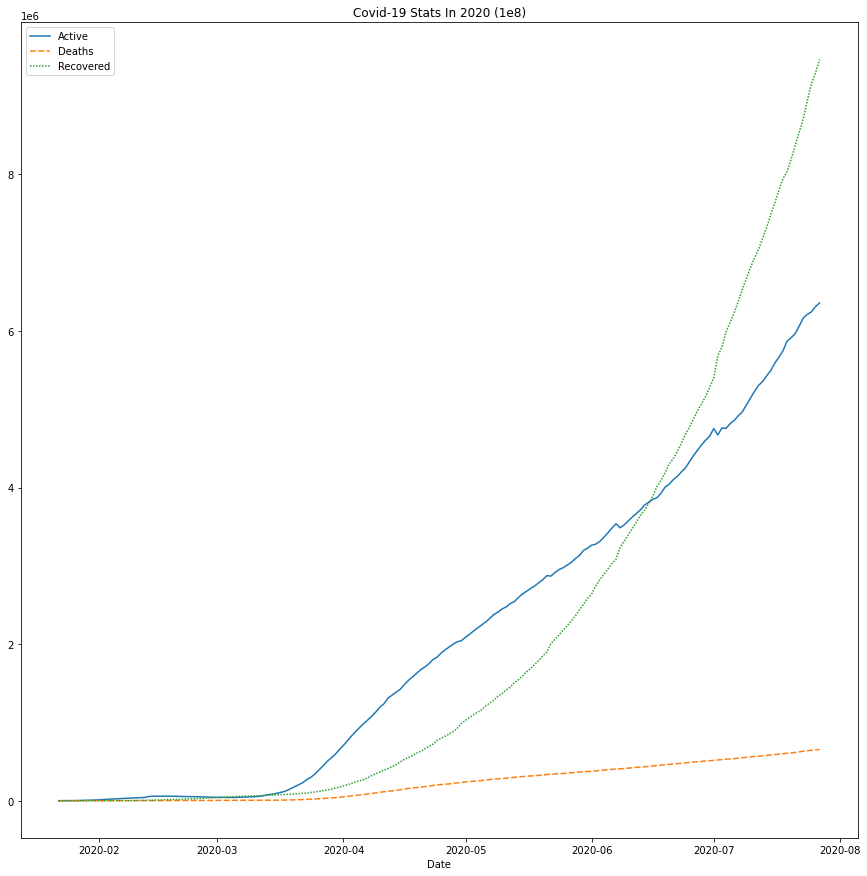

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.lineplot(data=Cases_In_Months_df).set(title='Covid-19 Stats In 2020 (1e8)')

# **Succesful**




